In [2]:
#Reading the data from the excel file created in the source file
import pandas as pd
data1=pd.read_excel('C:\\Users\\satya\\rosenbrock.xlsx')
data1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,0.486881,-0.773397,-0.050534,0.084568,-0.032604,-0.736818,0.295694,0.497740,-0.561831,298.125329
1,1,0.629629,0.957705,-0.659850,0.121552,0.824153,0.828809,-0.006234,0.237842,0.895073,487.138146
2,2,-0.712852,0.948625,0.572676,0.660235,-0.214652,0.542341,-0.398283,-0.982550,-0.914472,650.471675
3,3,-0.432045,0.884390,-0.044217,-0.804677,-0.516557,0.775618,-0.645234,0.445783,0.959935,568.687717
4,4,0.179924,0.043875,0.216944,-0.876370,-0.753894,0.685081,0.842100,0.230466,-0.526571,402.819802
...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,0.467579,-0.860763,0.800176,-0.560314,-0.392197,0.018670,-0.938476,-0.842295,-0.976001,998.068631
2496,2496,0.833969,-0.392949,0.347030,-0.678596,0.920039,-0.584858,-0.387439,-0.669473,0.843922,560.507127
2497,2497,0.202129,-0.514602,0.105609,-0.849493,0.763000,0.491210,0.295731,-0.483899,-0.334942,183.950358
2498,2498,-0.176911,-0.005577,-0.846307,0.465155,0.474745,0.610356,-0.262790,0.604143,-0.765866,304.714127


In [8]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data1.values)

In [9]:
X=scaled_data[:,1:10]
y=scaled_data[:,10]

In [10]:
#Splitting the data using sklearn function
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0) #Random state: to obtain the same data every time we run kernel

In [11]:
X_train.shape #to know the size of the dataset

(2125, 9)

In [12]:
#Creating sequential ANN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
#Creating ANN with mentioned nodes, hidden layers,inputs,outputs and activation function
model=Sequential()
model.add(Dense(100,input_dim=9,activation='tanh'))
model.add(Dense(110,activation='tanh'))
model.add(Dense(1,activation='linear'))

In [14]:
print(model.summary()) #model summary of total,trainable and non trainable parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 110)               11110     
                                                                 
 dense_2 (Dense)             (None, 1)                 111       
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
#Training the ANN using adam optimiser and MSE as loss fn.
model.compile(optimizer='adam',loss='MSE')

In [16]:
#Validation splits and iterations
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
57/57 [==============================] - 1s 5ms/step - loss: 0.0301 - val_loss: 0.0241
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0221
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0203 - val_loss: 0.0222
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.0223
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.0233
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0234
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0197
Epoch 8/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.0199
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 10/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0178
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0047
Epoch 84/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 85/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0049
Epoch 86/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 87/100
57/57 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 88/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0044
Epoch 89/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 90/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 91/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0081
Epoch 92/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 93/100


In [17]:
from sklearn.metrics import r2_score

In [18]:
y_train_pre=model.predict(X_train)

67/67 [==============================] - 0s 906us/step


In [19]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.894452036793692

In [20]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

12/12 [==============================] - 0s 2ms/step


0.8409616267576454

In [21]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

67/67 [==============================] - 0s 1ms/step


0.0026233255038779

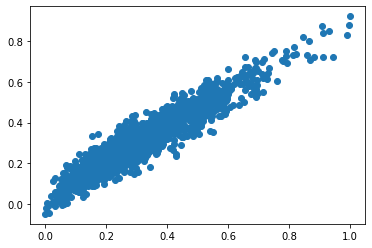

In [27]:
#Plotting scatter plot graphs for train ansd test data using the matplotlib function
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

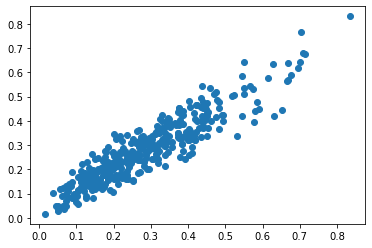

In [28]:
p.scatter(y_test, y_test_pre)

In [29]:
#Creating ANN with mentioned nodes, hidden layers,inputs,outputs and activation function
model=Sequential()
model.add(Dense(100,input_dim=9,activation='sigmoid'))
model.add(Dense(110,activation='sigmoid'))
model.add(Dense(1,activation='linear'))

In [30]:
print(model.summary()) #model summary of total,trainable and non trainable parameters

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1000      
                                                                 
 dense_4 (Dense)             (None, 110)               11110     
                                                                 
 dense_5 (Dense)             (None, 1)                 111       
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
#Training the ANN using adam optimiser and MSE as loss fn.
model.compile(optimizer='adam',loss='MSE')

In [32]:
#Validation splits and iterations
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
57/57 [==============================] - 1s 3ms/step - loss: 0.0273 - val_loss: 0.0240
Epoch 2/100
57/57 [==============================] - 0s 1ms/step - loss: 0.0241 - val_loss: 0.0220
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0211
Epoch 4/100
57/57 [==============================] - 0s 1ms/step - loss: 0.0211 - val_loss: 0.0204
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0221
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.0189
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0182
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0206
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0189
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0184
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0225
Epoch 84/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0178
Epoch 85/100
57/57 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.0184
Epoch 86/100
57/57 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0181
Epoch 87/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0178
Epoch 88/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0184
Epoch 89/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0179
Epoch 90/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0180
Epoch 91/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0186
Epoch 92/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0178
Epoch 93/100


In [33]:
from sklearn.metrics import r2_score

In [34]:
y_train_pre=model.predict(X_train)

67/67 [==============================] - 0s 975us/step


In [35]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.29792129974141557

In [36]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

12/12 [==============================] - 0s 1ms/step


0.25707720924617494

In [37]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

67/67 [==============================] - 0s 736us/step


0.017449706315201725

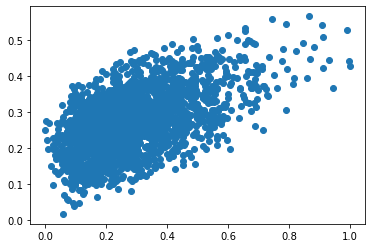

In [38]:
#Plotting scatter plot graphs for train ansd test data using the matplotlib function
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

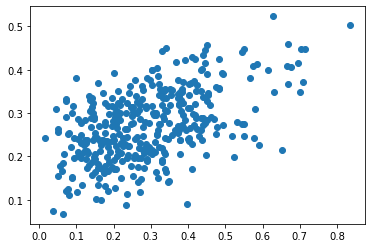

In [39]:
p.scatter(y_test, y_test_pre)

In [51]:
#Creating ANN with mentioned nodes, hidden layers,inputs,outputs and activation function
model=Sequential()
model.add(Dense(100,input_dim=9,activation='sigmoid'))
model.add(Dense(110,activation='tanh'))
model.add(Dense(1,activation='linear'))

In [52]:
print(model.summary()) #model summary of total,trainable and non trainable parameters

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1000      
                                                                 
 dense_10 (Dense)            (None, 110)               11110     
                                                                 
 dense_11 (Dense)            (None, 1)                 111       
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
#Training the ANN using adam optimiser and MSE as loss fn.
model.compile(optimizer='adam',loss='MSE')

In [54]:
#Validation splits and iterations
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
57/57 [==============================] - 2s 23ms/step - loss: 0.0319 - val_loss: 0.0217
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.0222
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.0202
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.0181
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.0348
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.0188
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0217
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.0200
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.0186
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.0242
Epoch 11

57/57 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0180
Epoch 84/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0249
Epoch 85/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0176
Epoch 86/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0220
Epoch 87/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0176
Epoch 88/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0176
Epoch 89/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 90/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0189
Epoch 91/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0177
Epoch 92/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0175
Epoch 93/100


In [55]:
#Validation splits and iterations
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0192
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0175
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.0187
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.0181
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0177
Epoch 6/100
57/57 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0177
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0185
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0171
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0171
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0185
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0132
Epoch 84/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0134
Epoch 85/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0131
Epoch 86/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0147
Epoch 87/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0131
Epoch 88/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0132
Epoch 89/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 90/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 91/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0133
Epoch 92/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0138
Epoch 93/100


In [56]:
from sklearn.metrics import r2_score

In [57]:
y_train_pre=model.predict(X_train)

67/67 [==============================] - 0s 1ms/step


In [58]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.5030554691486915

In [59]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

12/12 [==============================] - 0s 2ms/step


0.3762326331812683

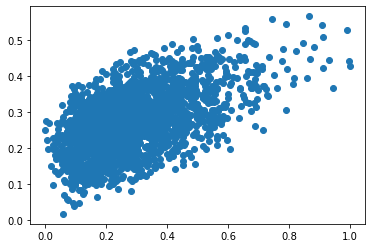

In [60]:
#Plotting scatter plot graphs for train ansd test data using the matplotlib function
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

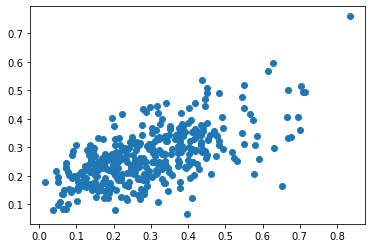

In [61]:
p.scatter(y_test, y_test_pre)